<a href="https://colab.research.google.com/github/Gurvinder211/Gurvinder211/blob/main/Fakenewspredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

**Exploring fake news**

In [ ]:
fake = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv')

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

**Wordcloud**

In [ ]:
' '.join(['this', 'is', 'a', 'data'])

'this is a data'

In [ ]:
text = ' '.join(fake['text'].tolist())

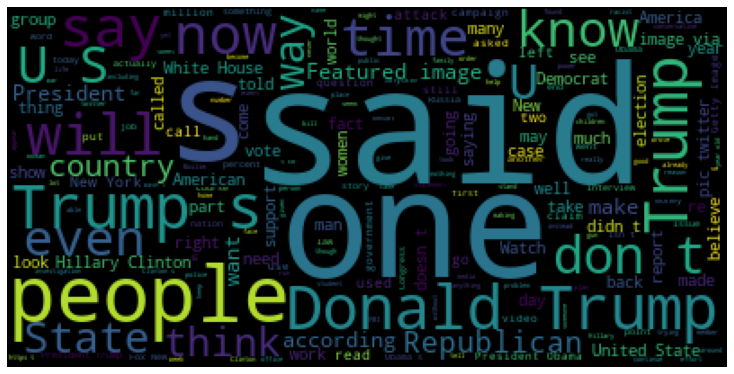

In [ ]:
wordcloud = WordCloud().generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud) 
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Exploring real news**

In [ ]:
real = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv')

In [ ]:
text = ' '.join(real['text'].tolist())

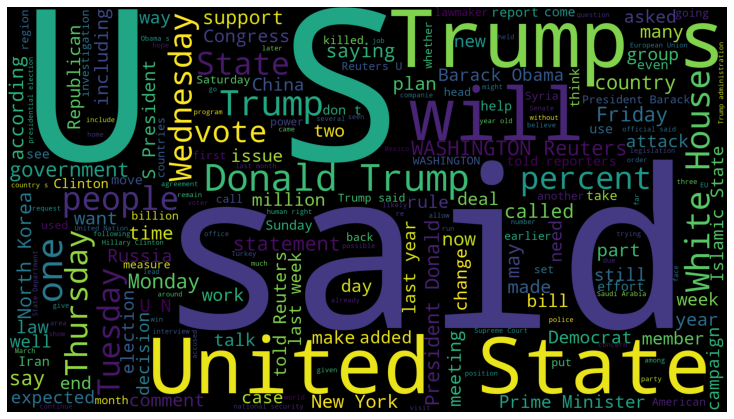

In [ ]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud) 
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


**Looking at the data:**

*   most of text contains reuters information such as "*WASHINGTON (Reuters)*"
*   Some text are tweets from Twitter
*   Few text do not contain any publication info





**Cleaning Data**

Removing Reuters or Twitter Tweet information from the text





In [ ]:
real.sample(5)

,title,text,subject,date
10737,Obama says cautiously optimistic of getting TP...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"February 22, 2016"
3388,Trump will not block ex-FBI chief Comey's test...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"June 5, 2017"
18723,Migrant smuggling crackdown triggered clashes ...,TRIPOLI (Reuters) - An armed group in the Liby...,worldnews,"September 29, 2017"
2203,Charlottesville violence tests Trump's preside...,"BEDMINSTER, N.J. (Reuters) - For President Don...",politicsNews,"August 13, 2017"
17900,Taiwan president pledges to defend freedoms de...,TAIPEI (Reuters) - President Tsai Ing-wen vowe...,worldnews,"October 10, 2017"


In [ ]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record = row.split('-', maxsplit=1)
    record[1]
        
    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [ ]:
len(unknown_publishers)

222

In [ ]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [ ]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [ ]:
real = real.drop(8970, axis=0)

In [ ]:
publisher = []
tmp_text = []

for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')
        
  else: 
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [ ]:
real['publisher']=publisher
real['text'] = tmp_text

In [ ]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:
real.shape

(21416, 5)

In [ ]:
empty_fake_index = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [ ]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
fake['text'] = fake['title'] + " " + fake['text']
real['text'] = real['title'] + " " + real['text']

**Preparing text data for modeling**

In [ ]:
real['class'] = 1
fake['class'] = 0

In [ ]:
real.columns 

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [ ]:
real = real[['text', 'class']]

In [ ]:
fake = fake[['text', 'class']]

In [ ]:
data = real.append(fake, ignore_index=True)

In [ ]:
data.sample(5)

,text,class
10987,House Speaker Ryan urges conservative unity in...,1
32840,"AMERICA TAKES IN 37,027 “REFUGEES” IN 5 MONTHS...",0
23760,Obama’s Secret Gift To The American People Co...,0
10193,Labor Department unveils controversial union '...,1
44283,Boiler Room EP #114 – Psychos In The Compromis...,0


In [ ]:
!pip install spacy==2.2.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.4 MB 5.0 MB/s 
     |████████████████████████████████| 184 kB 73.2 MB/s 
     |████████████████████████████████| 3.7 MB 36.6 MB/s 
     |████████████████████████████████| 2.2 MB 54.9 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.4
    Uninstalling srsly-2.4.4:
      Successfully uninstalled srsly-2.4.4
  Attempting uninstall: blis
    Found existing installation: blis 0.7.8
    Uninstalling blis-0.7.8:
      Successfully uninstalled blis-0.7.8
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.3
    Uninstalling thinc-8.1.3:
      Successfully uninstalled thinc-8.1.3
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: spacy
    Found existing installation: sp

In [ ]:
!python -m spacy download en_core_web_sm



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.0 MB 5.2 MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-py3-none-any.whl size=12011737 sha256=25adabd0bd0918f1fcf6e37d7e4bc4aa4886424459de990e53e90284ac6567e2
  Stored in directory: /tmp/pip-ephem-wheel-cache-1v4d9tr4/wheels/51/19/da/a3885266a3c241aff0ad2eb674ae058fd34a4870fef1c0a5a0
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.4.0
    Uninstalling en-core-web-sm-3.4.0:
      Successfully uninstalled en-core-web-sm-3.4.0
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
!pip install beautifulsoup4==4.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 5.1 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
!pip install textblob==0.15.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall


    

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-482epkm5
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-482epkm5
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11756 sha256=3ddf4743958fca3079ab599b788ed063397332540aaf8e84a3e254809af42b63
  Stored in directory: /tmp/pip-ephem-wheel-cache-xtso9vds/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps

In [ ]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

In [ ]:
ps.remove_special_chars('this ,. @ # is gre@at')

'this is great'

In [ ]:
data.head()

,text,class
0,As US budget fight looms Republicans flip thei...,1
1,US military to accept transgender recruits on ...,1
2,Senior US Republican senator Let Mr Mueller do...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge much more...,1


In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Vectorization**

Converting words in a sequence of vector

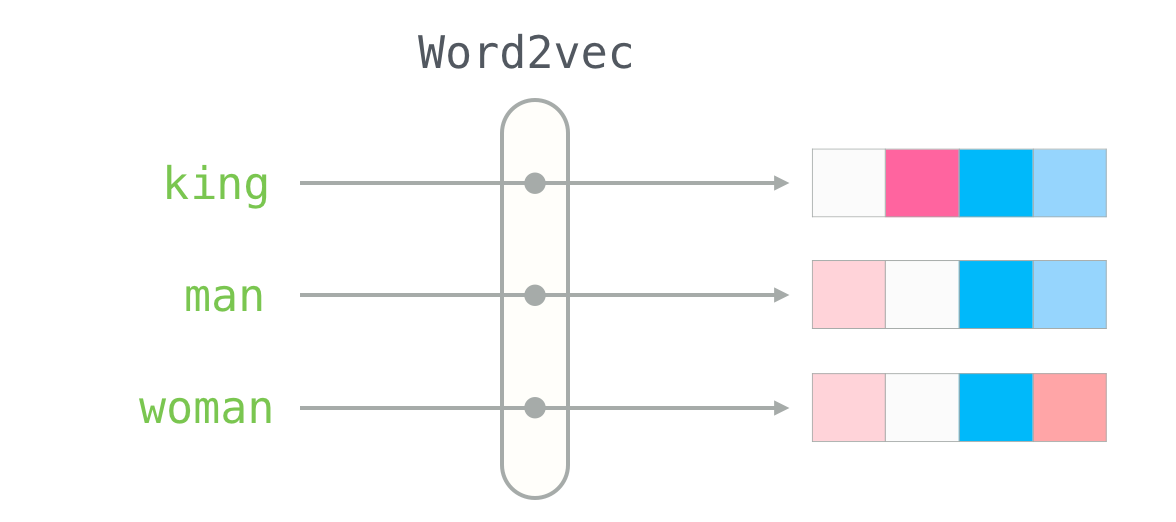

In [ ]:
import gensim

In [ ]:
y = data['class'].values

In [ ]:
X = [d.split() for d in data['text'].tolist()]

In [ ]:
type(X[0])

list

In [ ]:
print(X[0])

['As', 'US', 'budget', 'fight', 'looms', 'Republicans', 'flip', 'their', 'fiscal', 'script', 'The', 'head', 'of', 'a', 'conservative', 'Republican', 'faction', 'in', 'the', 'US', 'Congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'Sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'In', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'Republicans', 'US', 'Representative', 'Mark', 'Meadows', 'speaking', 'on', 'CBS', 'Face', 'the', 'Nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'January', 'When', 'they', 'return', 'from', 'the', 'holidays', 'on', 'Wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [ ]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, size=DIM, window=10, min_count=1)

In [ ]:
len(w2v_model.wv.vocab)

266212

In [ ]:
w2v_model['project']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-3.5335271 , -1.0972719 , -0.5869228 , -2.7050989 , -0.37610358,
        2.3955414 , -1.3473885 ,  1.0140038 ,  1.8616021 ,  0.5792792 ,
        2.0550196 , -0.3259689 , -1.5614315 , -4.281002  , -0.73229337,
        1.5914774 , -3.4418137 ,  3.547231  , -3.2665915 , -0.34957832,
       -2.9241004 , -1.4274896 ,  3.2584805 ,  0.6221431 , -0.511323  ,
       -2.3154552 ,  0.8293296 ,  0.9093588 , -1.2324537 , -0.13738923,
        0.9062444 , -3.2655823 , -0.6909687 , -1.4782047 , -1.4361478 ,
        1.0040556 , -0.56482065,  2.8000982 , -0.47542846, -0.33866802,
        2.4048026 ,  0.45189494,  0.85643685, -3.5083265 , -0.7539601 ,
       -0.821058  ,  5.686134  , -1.2812542 , -0.0957835 , -1.0322803 ,
       -0.6582989 , -0.33808833,  2.2624624 ,  0.31692085,  0.13332142,
       -1.4388834 , -1.117444  ,  1.0398968 ,  0.31258312,  2.039153  ,
       -0.60882205,  1.3033688 ,  1.7820566 , -3.5012116 ,  3.3134713 ,
        1.2583208 , -0.23192342,  1.4098556 , -1.0670168 ,  1.06

In [ ]:
w2v_model.wv.most_similar('information')

[('material', 0.8073728084564209),
 ('info', 0.7688136100769043),
 ('documents', 0.7084980010986328),
 ('emails', 0.6940223574638367),
 ('files', 0.6760321855545044),
 ('data', 0.639805018901825),
 ('materials', 0.6328428983688354),
 ('memos', 0.6286228895187378),
 ('documentation', 0.627653956413269),
 ('secrets', 0.6256274580955505)]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
X = tokenizer.texts_to_sequences(X)

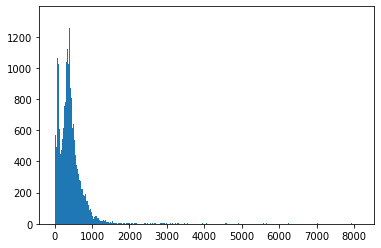

In [ ]:
plt.hist([len(x) for x in X], bins = 700)
plt.show()

In [ ]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

1581

In [ ]:
maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)

In [ ]:
len(X[101])

1000

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size, DIM))
    
    for word, i in vocab.items():
        try: weight_matrix[i] = model.wv[word]
        except: print(word, 'not found')

    
    return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

Streaming output truncated to the last 5000 lines.
securitysuch not found
drunkgolden not found
facultythat not found
nationsnow not found
thisis not found
iguina not found
organizationsobama not found
kremlinrussia not found
armyrussia not found
westterrorists not found
kingdombarack not found
groupvia not found
punditisrael not found
globethey not found
fridaytodenhofer not found
videosaccording not found
americanslaura not found
lasuzy not found
godbless not found
hudsection not found
freebiesthousands not found
norwalkofficials not found
censushousing not found
fundssource not found
yearsus not found
2017aides not found
syrianthe not found
americakerry not found
warkerry not found
senateus not found
accordby not found
chamberdespite not found
julywith not found
enactedthe not found
dealstephen not found
resolutionfour not found
timesangry not found
republicanvia not found
intoann not found
senatecorcoran not found
writeshas not found
decadessure not found
youhistory not found
histo

In [ ]:
embedding_vectors.shape

(231873, 100)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23187300  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23,304,677
Trainable params: 117,377
Non-trainable params: 23,187,300
_________________________________________________________________


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 46s 53ms/step - loss: 0.1458 - acc: 0.9475 - val_loss: 0.0726 - val_acc: 0.9757
Epoch 2/6
737/737 [==============================] - 39s 53ms/step - loss: 0.0665 - acc: 0.9773 - val_loss: 0.0616 - val_acc: 0.9777
Epoch 3/6
737/737 [==============================] - 39s 53ms/step - loss: 0.0363 - acc: 0.9876 - val_loss: 0.0341 - val_acc: 0.9888
Epoch 4/6
737/737 [==============================] - 40s 55ms/step - loss: 0.0264 - acc: 0.9914 - val_loss: 0.0316 - val_acc: 0.9899
Epoch 5/6
737/737 [==============================] - 40s 54ms/step - loss: 0.0141 - acc: 0.9954 - val_loss: 0.0604 - val_acc: 0.9802
Epoch 6/6
737/737 [==============================] - 40s 54ms/step - loss: 0.0081 - acc: 0.9978 - val_loss: 0.0258 - val_acc: 0.9916


In [ ]:
y_pred = (model.predict(X_test) >=0.5).astype(int)


351/351 [==============================] - 7s 19ms/step


In [ ]:
accuracy_score(y_test, y_pred)

0.9921603563474387

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5888
           1       0.99      0.99      0.99      5337

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
x = ["Unicorns Were Real, and a New Fossil Shows When They Lived"]
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

In [ ]:
(model.predict(x) >= 0.5).astype(int)

1/1 [==============================] - 0s 41ms/step


array([[0]])